In [1]:
import pandas as pd
import numpy as np



# importing the libraries 


# libraries for data wrangling and numerical computation
import pandas as pd
import numpy as np 
import math


# libraries for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

# libraries for machine learning modelling
from sklearn.linear_model import LinearRegression as lr   # regression algorithm
from sklearn.linear_model import LogisticRegression as logistic # classificaation algorithm


# libraries for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error



# libraries for hyperparameter optimization

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


In [2]:
# data = pd.read_csv('House_Rent_Dataset.csv')

data = pd.read_csv(r'C:\Users\hp\Desktop\New folder\Python Data Class\Data Science -- Machine Learning\data\House_Rent_Dataset.csv')

In [3]:
data.head(6)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner


### Data Wrangling and Visualization

#### cleaning the floor column

In [4]:
# inspecting the unique values 

data['Floor'].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [5]:
# extract the needed values into seperate columns
pattern = r'(.*) out of (.*)'


data[['apartment_floor', 'floors']] = data['Floor'].str.extract(pattern)

In [6]:
data['apartment_floor'].unique()

array(['Ground', '1', '2', '4', '3', '5', '7', '8', 'Upper Basement',
       '11', 'Lower Basement', '6', '14', '43', '13', '18', '17', '9',
       '19', '60', '34', '12', '26', '25', '53', '16', '10', '39', '32',
       '47', '28', '20', '15', '65', '40', '37', '22', '21', '30', '35',
       '33', '44', '41', '46', '27', '45', '48', '50', '24', '23', '29',
       '49', '36', '76', nan], dtype=object)

In [7]:
# handle the upper and lower basement variables by creaating new binary columns 

data['lower_basement'] = [1 if x == 'Lower Basement' else 0 for x in data['apartment_floor']]
data['upper_basement'] = [1 if x == 'Upper Basement' else 0 for x in data['apartment_floor']]

In [8]:
# assign theh value 0 to ground floor 

data_list = ['Ground', 'Lower Basement', 'Upper Basement']
data['apartment_floor'] = [0 if x in data_list else x for x in data['apartment_floor']]

In [9]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,apartment_floor,floors,lower_basement,upper_basement
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2,0,0
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,0,0
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,0,0
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2,0,0
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2,0,0


In [10]:
# drop the original floor column


data.drop(columns= ['Floor'], inplace= True)

#### Obtaining general information



In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Area Type          4746 non-null   object
 5   Area Locality      4746 non-null   object
 6   City               4746 non-null   object
 7   Furnishing Status  4746 non-null   object
 8   Tenant Preferred   4746 non-null   object
 9   Bathroom           4746 non-null   int64 
 10  Point of Contact   4746 non-null   object
 11  apartment_floor    4742 non-null   object
 12  floors             4742 non-null   object
 13  lower_basement     4746 non-null   int64 
 14  upper_basement     4746 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 556.3+ KB


In [12]:
# checking missing values 

data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
apartment_floor      4
floors               4
lower_basement       0
upper_basement       0
dtype: int64

In [13]:
# handle the missing value and the datatype

# missing value
data.dropna(inplace= True)
data.reset_index(inplace= True, drop= True)



# datatype

data['apartment_floor'] = data['apartment_floor'].apply(pd.to_numeric)
data['floors'] = data['floors'].apply(pd.to_numeric)
data['Posted On'] = data['Posted On'].apply(pd.to_datetime)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4742 entries, 0 to 4741
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Posted On          4742 non-null   datetime64[ns]
 1   BHK                4742 non-null   int64         
 2   Rent               4742 non-null   int64         
 3   Size               4742 non-null   int64         
 4   Area Type          4742 non-null   object        
 5   Area Locality      4742 non-null   object        
 6   City               4742 non-null   object        
 7   Furnishing Status  4742 non-null   object        
 8   Tenant Preferred   4742 non-null   object        
 9   Bathroom           4742 non-null   int64         
 10  Point of Contact   4742 non-null   object        
 11  apartment_floor    4742 non-null   int64         
 12  floors             4742 non-null   int64         
 13  lower_basement     4742 non-null   int64         
 14  upper_ba

In [15]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Area Type', 'Area Locality',
       'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom',
       'Point of Contact', 'apartment_floor', 'floors', 'lower_basement',
       'upper_basement'],
      dtype='object')

In [16]:
data.head(6)

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,apartment_floor,floors,lower_basement,upper_basement
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2,0,0
1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,0,0
2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,0,0
3,2022-07-04,2,10000,800,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2,0,0
4,2022-05-09,2,7500,850,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2,0,0
5,2022-04-29,2,7000,600,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,1,0,0


### Data Visualization

In [17]:
sns.set_style('darkgrid')
sns.set_palette('husl')

Text(0.5, 1.0, 'Number of houses posted in each City')

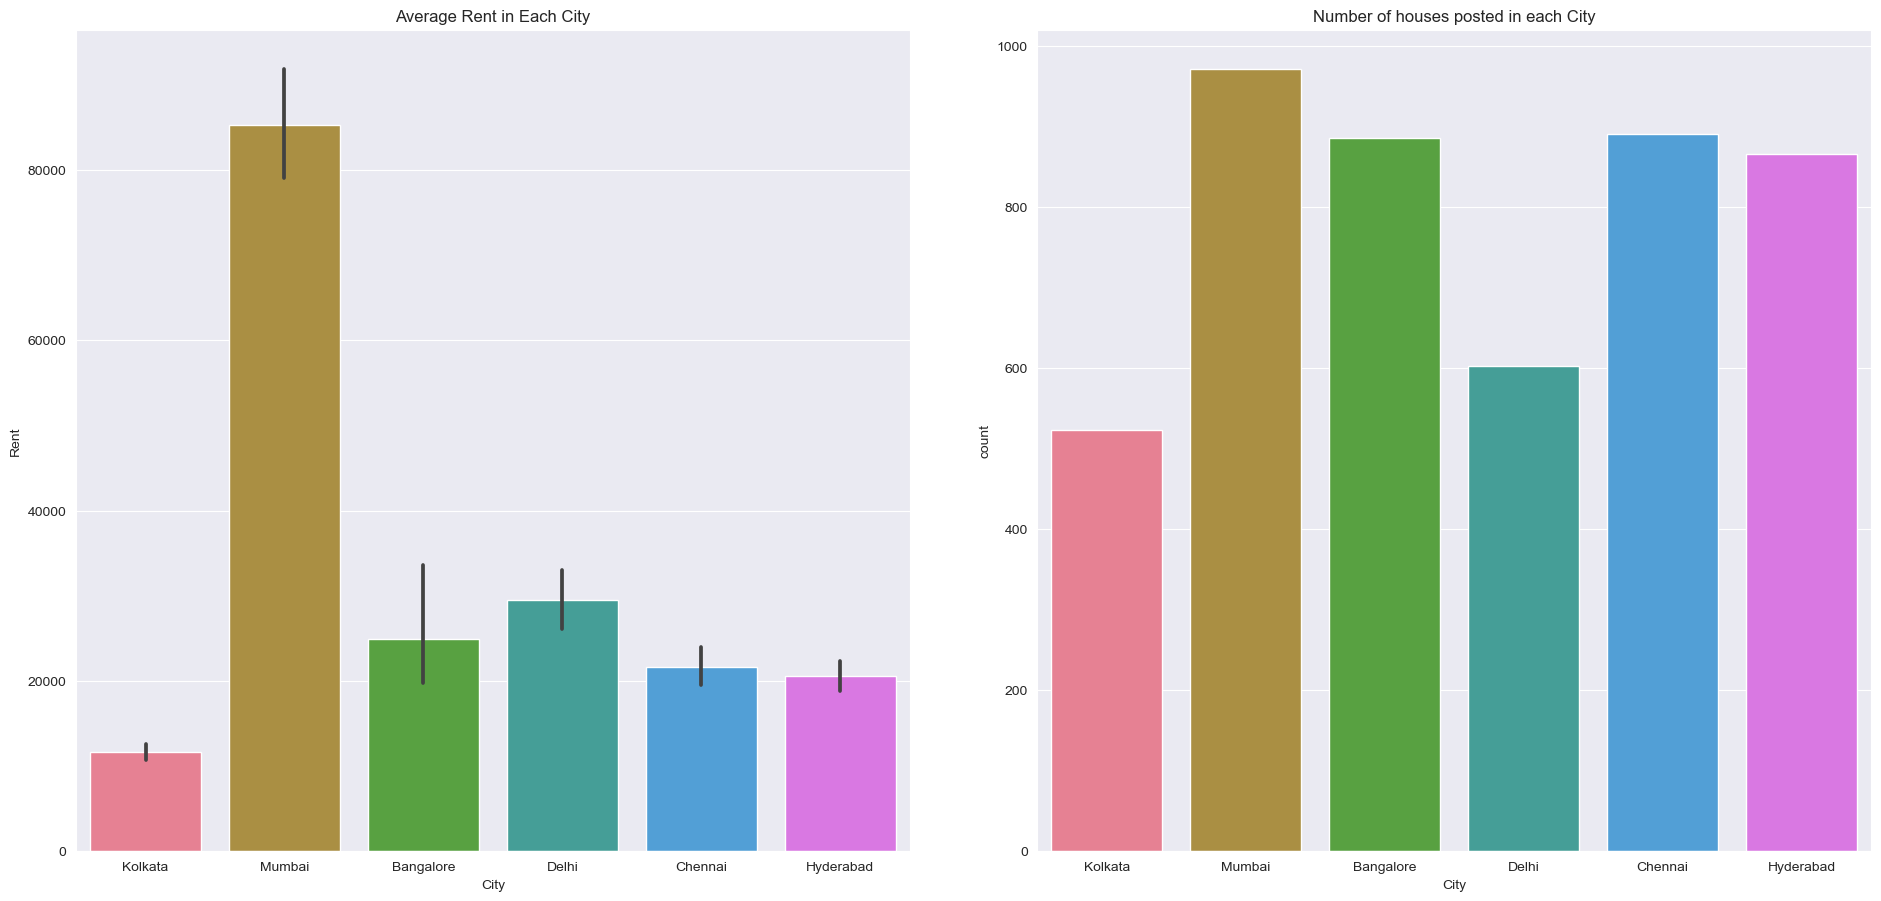

In [18]:
fig, axes = plt.subplots(1,2, figsize = (20, 10))

sns.barplot(data=data, x = 'City', y = 'Rent', ax= axes[0])
sns.countplot(data=data, x = 'City', ax = axes[1])

plt.tight_layout(pad= 5)

axes[0].set_title('Average Rent in Each City')
axes[1].set_title('Number of houses posted in each City')

Text(0.5, 0.98, 'DISTRIBUTION OF CONTINUOUS VARIABLES')

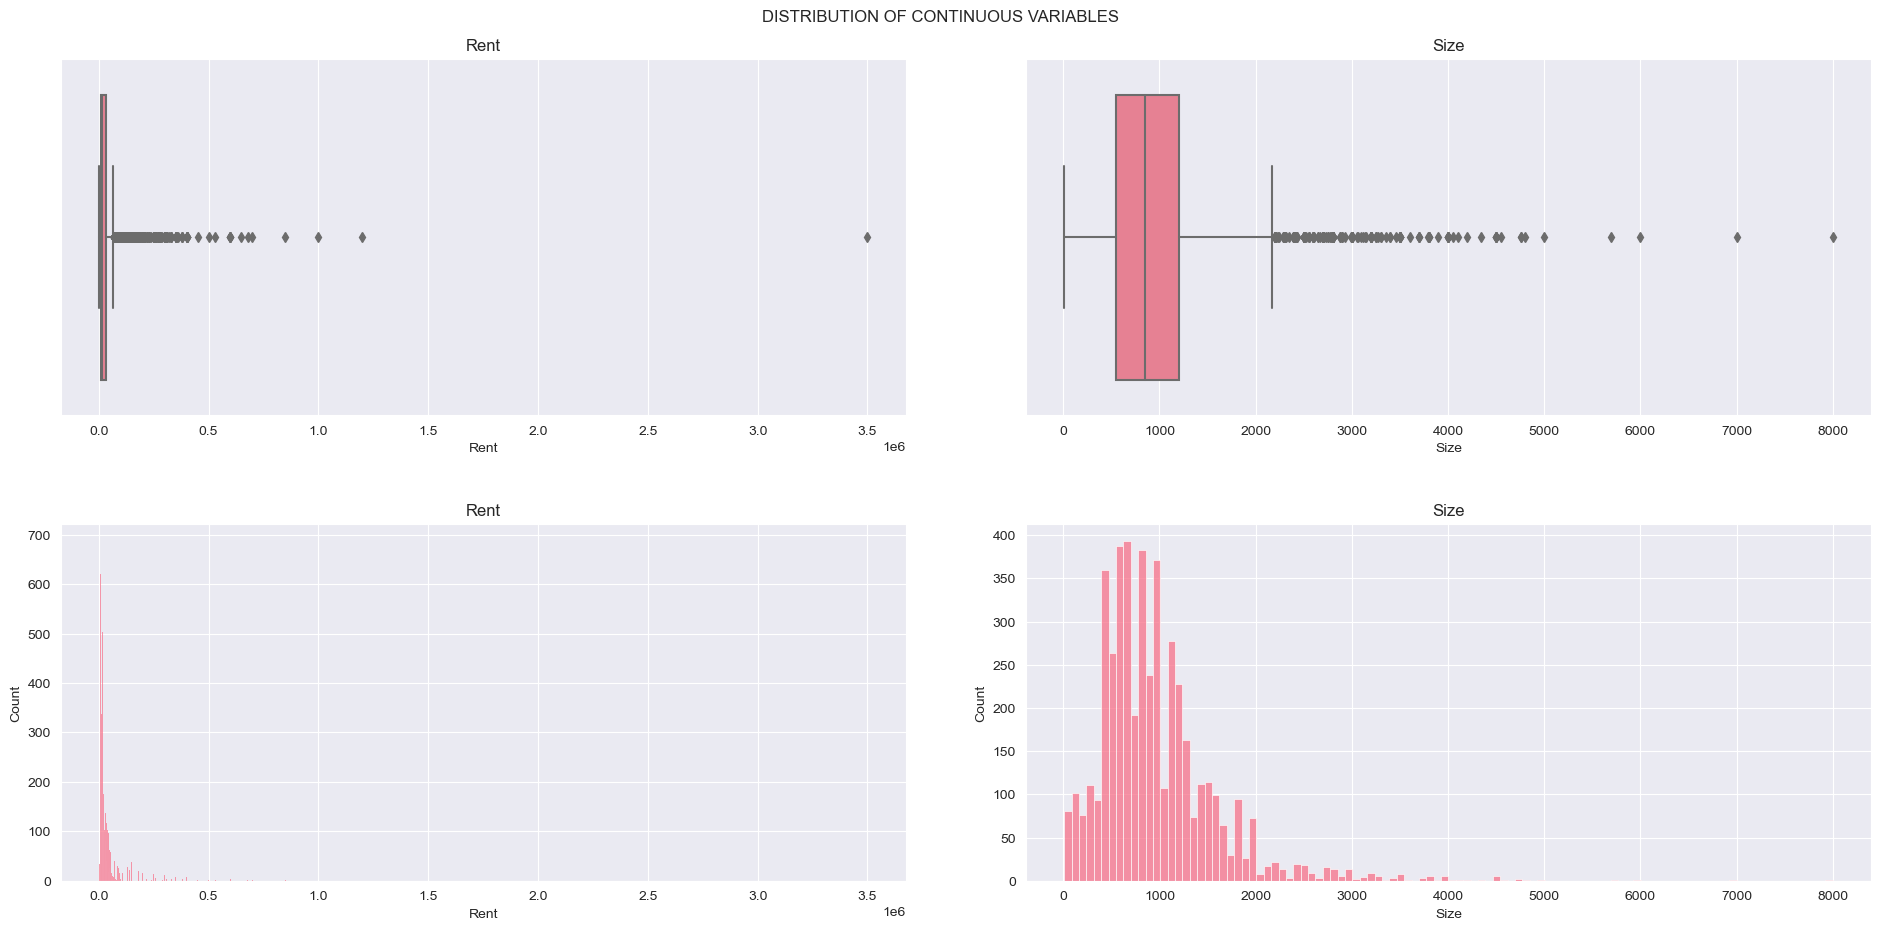

In [19]:
fig, axes = plt.subplots(2,2, figsize = (20, 10))

sns.boxplot(data=data, x = 'Rent', ax= axes[0,0])
sns.boxplot(data=data, x = 'Size', ax= axes[0,1])
sns.histplot(data=data, x = 'Rent', ax= axes[1,0])
sns.histplot(data=data, x = 'Size', ax= axes[1,1])


plt.tight_layout(pad= 5)

axes[0,0].set_title('Rent')
axes[0,1].set_title('Size')
axes[1,0].set_title('Rent')
axes[1,1].set_title('Size')

plt.suptitle('DISTRIBUTION OF CONTINUOUS VARIABLES')


In [20]:
data['City'].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    866
Delhi        603
Kolkata      524
Name: City, dtype: int64

Text(0.5, 1.0, 'Average Rent by Furnishing status')

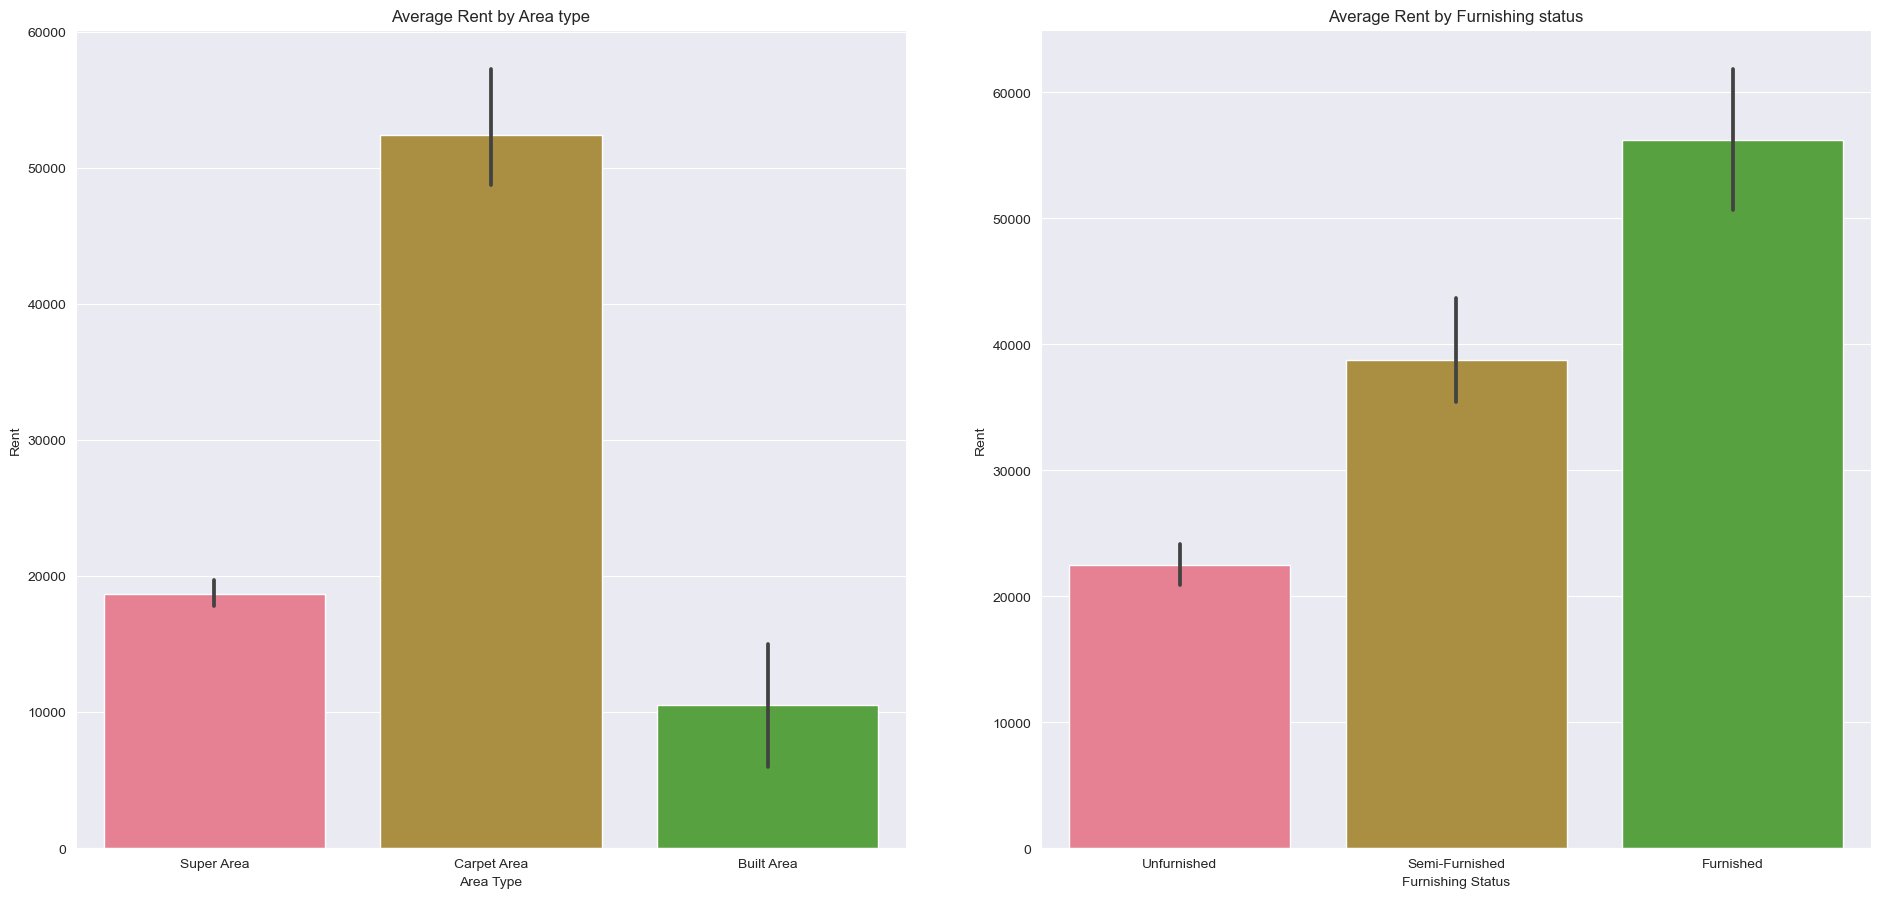

In [21]:
fig, axes = plt.subplots(1,2, figsize = (20, 10))

sns.barplot(data=data, x = 'Area Type', y = 'Rent', ax= axes[0])
sns.barplot(data=data, x = 'Furnishing Status',y = 'Rent', ax = axes[1])

plt.tight_layout(pad= 5)

axes[0].set_title('Average Rent by Area type')
axes[1].set_title('Average Rent by Furnishing status')

Text(0.5, 1.0, 'Average Rent by Tenant Preferred')

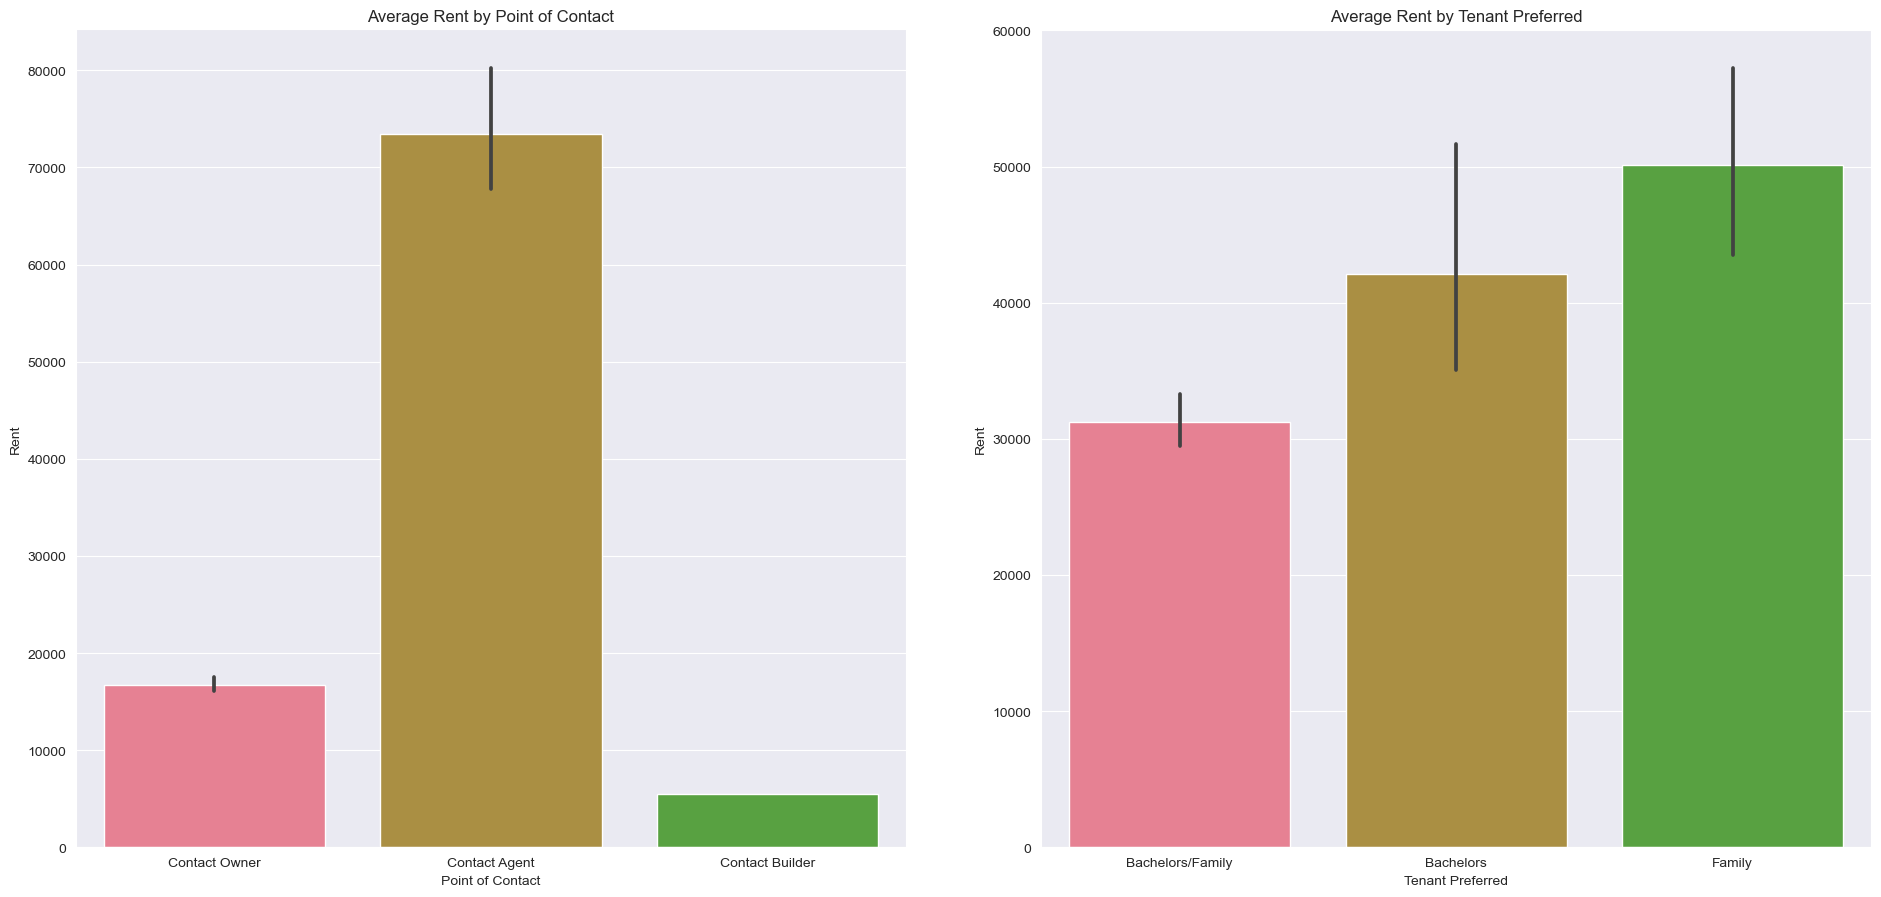

In [22]:
fig, axes = plt.subplots(1,2, figsize = (20, 10))

sns.barplot(data=data, x = 'Point of Contact', y = 'Rent', ax= axes[0])
sns.barplot(data=data, x = 'Tenant Preferred',y = 'Rent', ax = axes[1])

plt.tight_layout(pad= 5)

axes[0].set_title('Average Rent by Point of Contact')
axes[1].set_title('Average Rent by Tenant Preferred')

C:\Users\hp\AppData\Local\Temp\ipykernel_12640\447360466.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = data.corr(method= 'spearman')


<Axes: >

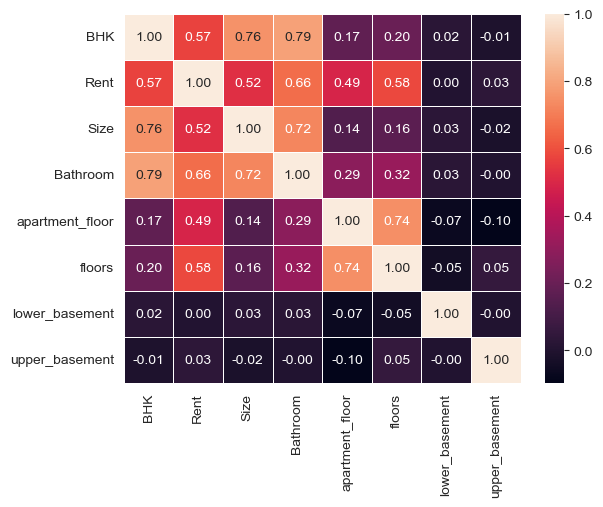

In [23]:
# correlation analyis

data_corr = data.corr(method= 'spearman')

sns.heatmap(data= data_corr, annot= True, linewidths=.5, fmt='.2f')

In [24]:
# drop area locality column
 
data.drop(columns=['Area Locality'], inplace= True)

In [25]:
# encoding the categorical columns 

data_enc = pd.get_dummies(data= data,columns= ['Area Type',
                          'City','Furnishing Status','Tenant Preferred','Point of Contact'])

In [26]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Area Type', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact',
       'apartment_floor', 'floors', 'lower_basement', 'upper_basement'],
      dtype='object')

#### problems 
1. outliers and normality
2. colinearity -- size/bhk/bathroom
3. drop area locality
4. encoding


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# split data

X = data_enc.drop(columns=['Posted On', 'Rent'])
y = data_enc['Rent']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2,
                                                    random_state = 42)


In [39]:
splits = {'X_train':X_train,
          'X_test':X_test,
          'y_train':y_train,
          'y_test':y_test}

for i,v in splits.items():
    print(f'{i}: {v.shape}')

X_train: (3793, 25)
X_test: (949, 25)
y_train: (3793,)
y_test: (949,)


In [40]:
# build regression model -- fit and predict

from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()

In [42]:
# fit th model on the training set
model = lr.fit(X_train, y_train)


# use the model to predict the test set

test_prediction = model.predict(X_test)

In [45]:
# get test and train predictions 

from sklearn.metrics import mean_squared_error

def rmse(target, prediction):
    result = mean_squared_error(y_true= target, y_pred= prediction, squared=False)
    return result

In [46]:
test_rmse = rmse(target=y_test, prediction=test_prediction)
print(f'test_rmse: {test_rmse}')

test_rmse: 43972.53885202311


In [48]:
# evaluate the model on the trainin set

train_predictions = model.predict(X_train)

train_rmse = rmse(target=y_train, prediction=train_predictions)

print(f'test_rmse: {test_rmse}')
print(f'train_rmse: {train_rmse}')

test_rmse: 43972.53885202311
train_rmse: 68481.25251713992


In [32]:
# scale the data

In [33]:
# get the model weights and intercepts

